In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [3]:
# Importing or load the dataset
df=pd.read_csv('Algerian_forest_fires_cleaned.csv')

# Display the first 5 rows of the dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# Display the structure of the dataset, its data types and number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [5]:
# Display the number of rows and columns of the dataset
df.shape

(243, 15)

In [6]:
# Check if there is any null values in all the features
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [8]:
# Show the statistical summary of the dataset
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


## Data Cleaning

Count the number of unique values in selected column ( Classesa and year)

In [9]:

print(df['year'].value_counts())
print(df['Classes'].value_counts())

year
2012    243
Name: count, dtype: int64
Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64


Remove extra spaces in the Classes column as the column contains duplicates

In [12]:
df.Classes = df.Classes.str.strip()

In [13]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

Drop the year column as the data is in same year

In [14]:
df = df.drop(['year'],axis=1)

## Data Visualization and Observations

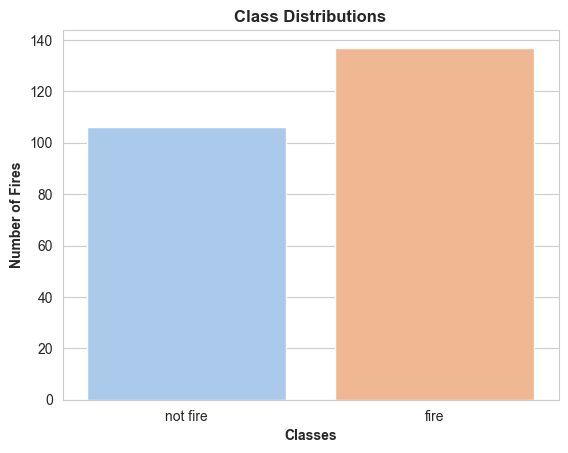

In [980]:
# Plot the class distribution: fire and not fire from the dataset
palette = sns.color_palette("pastel")
sns.countplot(x='Classes', data=df, palette=palette)
plt.title('Class Distributions',weight='bold')
plt.xlabel('Classes',weight='bold')
plt.ylabel('Number of Fires',weight='bold')
plt.show()

The bar chart demonstrates that class Fire is more frequent than class Not Fire in the dataset.

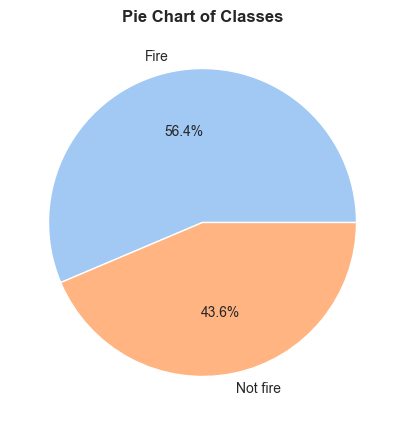

In [736]:
# Percentage of no of fires in the dataset
percentage = df.Classes.value_counts(normalize=True)*100
pie_colors = ['#FF5733', '#3388FF'] 
classeslabels = ["Fire", "Not fire"]
plt.figure(figsize =(10, 5))
pie_colors = sns.color_palette("pastel")
plt.pie(percentage, labels=classeslabels, autopct='%1.1f%%', colors=pie_colors)
plt.title ("Pie Chart of Classes", weight='bold')
plt.show() 
     

The chart shows that 56.4% of the instances in your dataset are classified as "Fire" and 43.6% are classified as "Not Fire".

Text(0.5, 1.0, 'Monthly Fire Analysis')

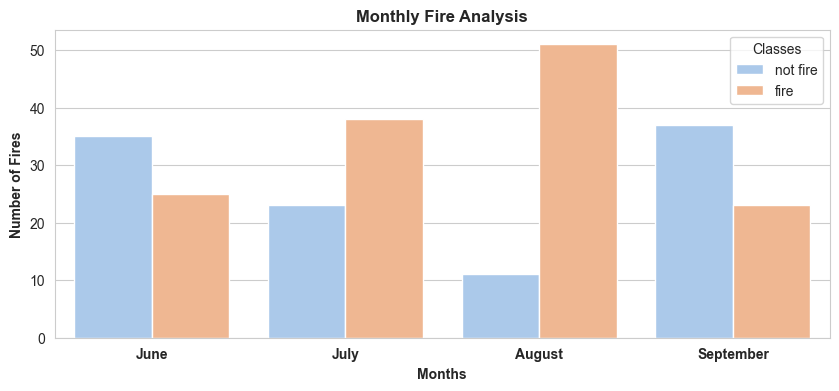

In [737]:

plt.subplots(figsize=(10,4))
sns.set_style('whitegrid')
palette = sns.color_palette("pastel")
sns.countplot(x='month',hue='Classes',data=df, palette=palette)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',],weight='bold')
plt.title("Monthly Fire Analysis",weight='bold')

It observes that August stands out with the highest number of fire incidents among all months.
September and June have a higher number of non-fire incidents compared to fire incidents.
July and August are critical months with a noticeable increase in fire incidents, particularly in August.

## Feature Engineering

Map the Classes column values to 0 = not fire and 1 = fire

In [15]:
df['Classes'] = df['Classes'].map({'not fire' : 0, 'fire': 1})

df.head(5)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Drop features (day, month) beacuse it is not important for analysis

In [16]:
df = df.drop(['day','month'], axis=1)

Splitting the data into X contains all the features except "FWI" and y contains only the values of the "FWI" column which is the target variable we aim to predict

In [17]:
X = df.drop("FWI", axis=1)
y = df["FWI"]

In [1102]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape,X_test.shape

((194, 11), (49, 11))

In [20]:
y_train.shape,y_test.shape

((194,), (49,))

Checking multicollinearlity and remove highly corrrelated features

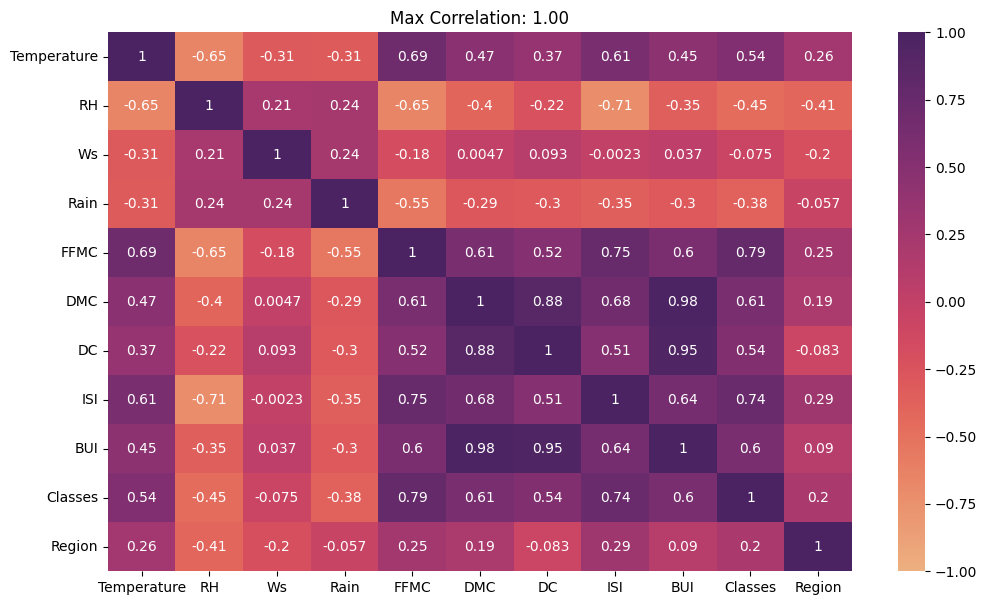

In [21]:
corr_matrix = X_train.corr()
max_corr = corr_matrix.stack().max()

plt.figure(figsize=(12, 7))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, vmax=max_corr, vmin=-max_corr, cmap='flare')
plt.title(f'Max Correlation: {max_corr:.2f}')
plt.show()

BUI and DC has a high correlation. So, we can drop one of the features.

In [22]:
X_train.drop({'BUI', 'DC'},axis=1,inplace=True)

In [23]:
X_test.drop({'BUI', 'DC'},axis=1,inplace=True)

In [24]:
(X_train.shape), (X_test.shape)

((194, 9), (49, 9))

## Feature scaling using Standardization

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize Standard Scaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Selection For Regression 

## Linear Regression 

In [26]:
from sklearn.linear_model import LinearRegression

# Create linear regression model
linear_reg=LinearRegression()

# Pass the training data to the model
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
print('Intercept is :',linear_reg.intercept_)
print('Coefficient is :',linear_reg.coef_)

Intercept is : 7.420103092783505
Coefficient is : [-0.02653611 -0.1808412  -0.01415259 -0.0330928  -0.82478219  3.80917655
  4.89287492  0.39085739 -0.4004259 ]


In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

linear_reg_pred= linear_reg.predict(X_test_scaled)

#Cross Validation
linear_reg_r2_score = r2_score(y_test, linear_reg_pred)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))

print(f'R2 Score: {linear_reg_r2_score}')
print(f'MAE: {linear_reg_mae}')
print(f'MSE: {linear_reg_mse}')
print(f'RMSE: {linear_reg_rmse}')



R2 Score: 0.9805895859259883
MAE: 0.5049978694165663
MSE: 0.5882990110708648
RMSE: 0.7670065260940514


For Linear Regression, 98% of the changes in the data match the actual data with the low MAE, MSE, and RMSE values producing highly accurate predictions with minimal errors.







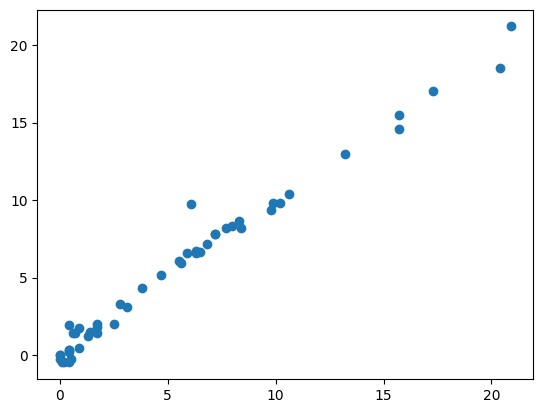

In [29]:
plt.scatter(y_test,linear_reg_pred)

## Recursive Feature Elimination (RFE)
- Techniques to find out important features for the model

In [30]:
# Techniques to find out important features for the model
from sklearn.feature_selection import RFE

rfe = RFE(estimator= LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [31]:
# get the features selected by RFE
rfe.get_feature_names_out()

array(['FFMC', 'DMC', 'ISI', 'Classes', 'Region'], dtype=object)

In [32]:
# Listing the rankings of features
rfe.ranking_

array([4, 3, 5, 2, 1, 1, 1, 1, 1])

A rank of 1 means the feature is considered the most important by the RFE 

## Variance Inflation Factor (VIF)
- VIF measures the degree of multicollinearity among multiple regression variables.
- Drop each feature with the highest VIF score one at a time

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Store the features(columns) and the VIF score
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,vif
0,Temperature,109.429048
1,RH,32.236045
2,Ws,37.130416
3,Rain,1.655248
4,FFMC,114.994902
5,DMC,205.539005
6,DC,51.257576
7,ISI,11.137955
8,BUI,393.610061
9,Classes,7.064774


In [34]:
# Drop the feature with the highest VIF one at a time
X.drop("BUI", axis=1, inplace=True)

In [35]:
vif=  pd.DataFrame()

vif['feature']= X.columns
vif['vif']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,vif
0,Temperature,109.166458
1,RH,32.212117
2,Ws,37.119996
3,Rain,1.651458
4,FFMC,114.820856
5,DMC,19.565136
6,DC,13.551424
7,ISI,11.131733
8,Classes,6.944951
9,Region,3.038594


In [36]:
# Drop the feature with the highest VIF
X.drop(columns=["FFMC"], axis=1, inplace=True)

In [37]:

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,vif
0,Temperature,36.801483
1,RH,32.174508
2,Ws,35.328734
3,Rain,1.443251
4,DMC,19.521553
5,DC,13.548331
6,ISI,11.115805
7,Classes,5.689791
8,Region,3.035769


In [38]:
# Drop the feature with the highest VIF
X.drop(columns=["Temperature"], axis=1, inplace=True)

In [39]:
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,vif
0,RH,23.618838
1,Ws,32.591026
2,Rain,1.441336
3,DMC,19.521511
4,DC,13.535772
5,ISI,9.796390
6,Classes,5.662379
7,Region,2.713006


In [40]:
X.drop(columns=["Ws"], axis=1, inplace=True)

In [41]:
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,vif
0,RH,3.032168
1,Rain,1.368589
2,DMC,19.110532
3,DC,13.213015
4,ISI,6.946249
5,Classes,5.504120
6,Region,2.659704


In [42]:
X.drop(columns=["DMC"], axis=1, inplace=True)

In [43]:
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,feature,vif
0,RH,2.990961
1,Rain,1.360137
2,DC,3.235460
3,ISI,5.794194
4,Classes,5.492709
5,Region,2.131770


Remaining features after VIF processs

In [44]:
X.columns

Index(['RH', 'Rain', 'DC', 'ISI', 'Classes', 'Region'], dtype='object')

## Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [46]:
X_poly.shape

(243, 27)

In [47]:
X_tr_poly, X_te_poly, y_tr, y_te = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [48]:
linear_reg.fit(X_tr_poly, y_tr)

LinearRegression()

In [49]:
linear_reg_poly_pred = linear_reg.predict(X_te_poly)

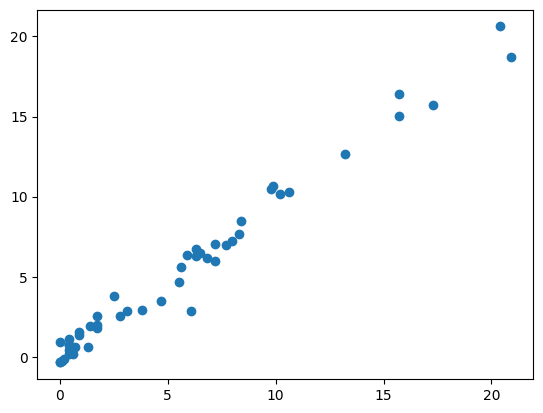

In [51]:
plt.scatter(y_test,linear_reg_poly_pred)

In [52]:
# Polynomial Regression Score Metrics
linear_reg_poly_r2_score = r2_score(y_test, linear_reg_poly_pred)
linear_reg_poly_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_reg_poly_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_poly_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))

print(f'R2 Score: {linear_reg_poly_r2_score}')
print(f'MAE: {linear_reg_poly_mae}')
print(f'MSE: {linear_reg_poly_mse}')
print(f'RMSE: {linear_reg_poly_rmse}')

R2 Score: 0.9776567109103836
MAE: 0.5049978694165663
MSE: 0.5882990110708648
RMSE: 0.7670065260940514


In [1040]:
print(f"R-Squared Accuracy : {round(linear_reg_poly_r2_score*100,2)} %")

R-Squared Accuracy : 97.77 %


## Ridge Regression, Lasso, Elastic Net 
- Regularization techniques used in linear regression to prevent overfitting and improve the model's generalization performance

In [53]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge Regression 
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_rd = ridge_reg.predict(X_test_scaled)

In [54]:
# Display co-efficients and intercept 
print("Co-efficients of independent features is {}".format(ridge_reg.coef_))
print("Intercept of best fit {}".format(ridge_reg.intercept_))

Co-efficients of independent features is [-0.02653019 -0.18087224 -0.01413443 -0.03309224 -0.82474448  3.80916356
  4.89278213  0.39088537 -0.4004199 ]
Intercept of best fit 7.420103092783505


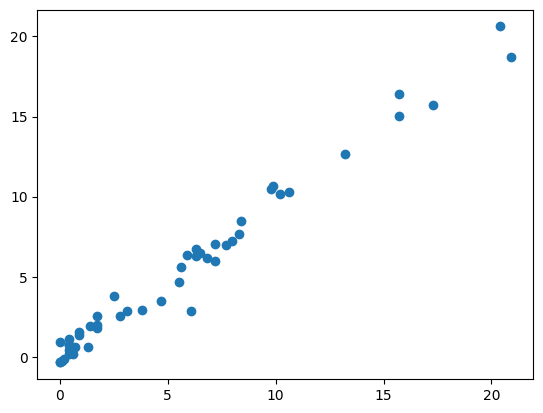

In [56]:
# Prediction of test data for Polynomial Regression
ridge_reg_pred=ridge_reg.predict(X_test_scaled)

plt.scatter(y_test,linear_reg_poly_pred)

In [57]:
# Cross Validation
ridge_reg_mse = round(mean_squared_error(y_test, ridge_reg_pred), 2)
ridge_reg_mae = round(mean_absolute_error(y_test, ridge_reg_pred), 2)
ridge_reg_rmse = round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)), 2)

print(f"MSE: {ridge_reg_mse}")
print(f"MAE: {ridge_reg_mae}")
print(f"RMSE: {ridge_reg_rmse}")

MSE: 0.59
MAE: 0.51
RMSE: 0.77


0.59 meaning the model's predictions are quite close to the actual values.
0.5 means that, on average, our predictions are off by half a unit. 
0.77 means that, on average, our predictions are about 0.77 units away from the actual values

In [58]:
# Performance Metrics
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
print(f"R-Squared Accuracy : {round(ridge_reg_r2_score*100,3)} %")

R-Squared Accuracy : 98.059 %


Lasso Regression Model

In [59]:
# Create Lasso regression model
lasso_reg=Lasso()
lasso_reg

Lasso()

In [60]:
# Passing training data(X and y) to the model
lasso_reg.fit(X_train_scaled, y_train)

Lasso()

In [61]:
# Print co-efficients and intercept of best fit hyperplane
print("Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("Intercept of best fit  {}".format(lasso_reg.intercept_))

Co-efficients of independent features is [ 0.         -0.          0.         -0.          0.          3.11343121
  4.04219354  0.         -0.        ]
Intercept of best fit  7.420103092783505


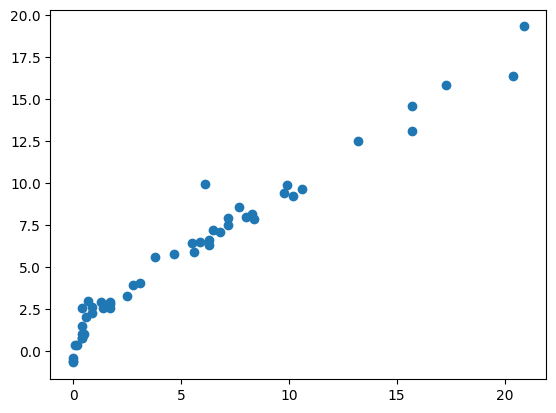

In [64]:
# Prediction of test data
lasso_reg_pred=lasso_reg.predict(X_test_scaled)

plt.scatter(y_test,lasso_reg_pred)

In [65]:
# Prediction of test data
lasso_reg_pred=lasso_reg.predict(X_test_scaled)

# Cross Validation
lasso_reg_mse = round(mean_squared_error(y_test, lasso_reg_pred), 2)
lasso_reg_mae = round(mean_absolute_error(y_test, lasso_reg_pred), 2)
lasso_reg_rmse = round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)), 2)

print(f"MSE: {lasso_reg_mse}")
print(f"MAE: {lasso_reg_mae}")
print(f"RMSE: {lasso_reg_rmse}")

MSE: 1.73
MAE: 1.01
RMSE: 1.31


In [66]:
# Performance Metrics
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
print(f"R-Squared Accuracy : {round(lasso_reg_r2_score*100,3)} %")

R-Squared Accuracy : 94.305 %


Elastic Net Regression Model

In [67]:
# Create Elastic-Net regression model
elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [68]:
# Passing training data to the model
elastic_reg.fit(X_train_scaled, y_train)

ElasticNet()

In [69]:
### Printing co-efficients and intercept of best fit hyperplane
print("Co-efficients of independent features is {}".format(elastic_reg.coef_))
print("Intercept of best fit is {}".format(elastic_reg.intercept_))

Co-efficients of independent features is [ 0.16932034 -0.47589083  0.         -0.          0.39758893  2.46069699
  2.40623714  0.85577059  0.        ]
Intercept of best fit is 7.420103092783506


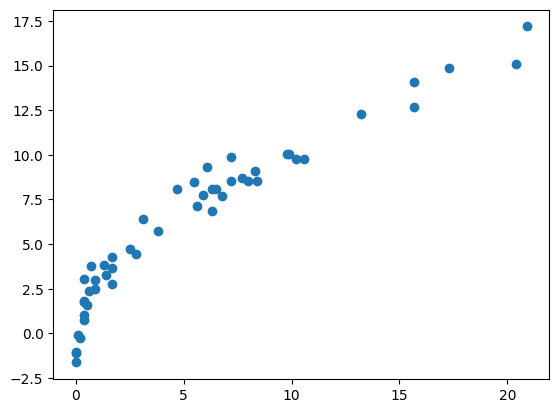

In [70]:
# Prediction of test data
elastic_reg_pred=elastic_reg.predict(X_test_scaled)

plt.scatter(y_test,elastic_reg_pred)

In [71]:
# Cross Validation
elastic_reg_mse = round(mean_squared_error(y_test, elastic_reg_pred), 2)
elastic_reg_mae = round(mean_absolute_error(y_test, elastic_reg_pred), 2)
elastic_reg_rmse = round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)), 2)

print(f"MSE: {elastic_reg_mse}")
print(f"MAE: {elastic_reg_mae}")
print(f"RMSE: {elastic_reg_rmse}")

MSE: 4.01
MAE: 1.68
RMSE: 2.0


In [73]:
# Performance Metrics
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
print(f"R-Squared Accuracy : {round(elastic_reg_r2_score*100,3)}%")

R-Squared Accuracy : 86.77%


In [74]:
print("MSE:")
print(f"Linear Regression: {round(linear_reg_mse, 2)}")
print(f"Ridge Regression: {round(ridge_reg_mse, 2)}")
print(f"Lasso Regression: {round(lasso_reg_mse, 2)}")
print(f"Elastic Net Regression: {round(elastic_reg_mse, 2)}")
print()
print("MAE:")
print(f"Linear Regression: {round(linear_reg_mae, 2)}")
print(f"Ridge Regression: {round(ridge_reg_mae, 2)}")
print(f"Lasso Regression: {round(lasso_reg_mae, 2)}")
print(f"Elastic Net Regression: {round(elastic_reg_mae, 2)}")
print()
print("RMSE:")
print(f"Linear Regression: {round(np.sqrt(linear_reg_rmse), 2)}")
print(f"Ridge Regression: {round(np.sqrt(ridge_reg_mse), 2)}")
print(f"Lasso Regression: {round(np.sqrt(linear_reg_rmse), 2)}")
print(f"Elastic Net Regression: {round(np.sqrt(elastic_reg_rmse), 2)}")
print()
print("R-Squared Accuracy:")
print(f"Linear Regression : {round(linear_reg_r2_score*100,3)}%")
print(f"Ridge Regression : {round(ridge_reg_r2_score*100,3)}%")
print(f"Lasso Regression : {round(lasso_reg_r2_score*100,3)}%")
print(f"Elastic Net Regression : {round(elastic_reg_r2_score*100,3)}%")


MSE:
Linear Regression: 0.59
Ridge Regression: 0.59
Lasso Regression: 1.73
Elastic Net Regression: 4.01

MAE:
Linear Regression: 0.5
Ridge Regression: 0.51
Lasso Regression: 1.01
Elastic Net Regression: 1.68

RMSE:
Linear Regression: 0.88
Ridge Regression: 0.77
Lasso Regression: 0.88
Elastic Net Regression: 1.41

R-Squared Accuracy:
Linear Regression : 98.059%
Ridge Regression : 98.059%
Lasso Regression : 94.305%
Elastic Net Regression : 86.77%


Linear Regression and Ridge Regression have the highest R-Squared accuracy of approximately 98.059%.

## Decision Tree Regressor

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Data Preprocessing for Classification
X = df.drop('Classes',axis=1)
y= df['Classes']

# Train and test the dataset    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=36)
X_train.shape, X_test.shape

((170, 11), (73, 11))

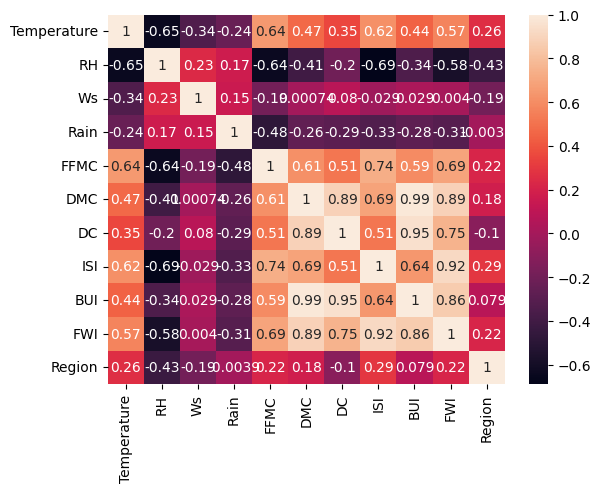

In [76]:
# Checking multicollinearlity and remove highly corrrelated features
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [77]:
X_train.drop({'BUI', 'DC', 'FWI'},axis=1, inplace=True)
X_test.drop({'BUI', 'DC', 'FWI'},axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 8), (73, 8))

Feature scaling using Standardization

In [78]:
scaler = StandardScaler()
X_train_decision_scaled = scaler.fit_transform(X_train)
X_test_decision_scaled = scaler.transform(X_test)

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train_decision_scaled,y_train)
dtc_pred = dtc.predict(X_test_decision_scaled)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



Approximately 97.26% of the predictions made by the model are correct.

## Feature Selection for Model Deployment

In [80]:
vif

,feature,vif
0,RH,2.990961
1,Rain,1.360137
2,DC,3.235460
3,ISI,5.794194
4,Classes,5.492709
5,Region,2.131770


Text(0, 0.5, 'Features')

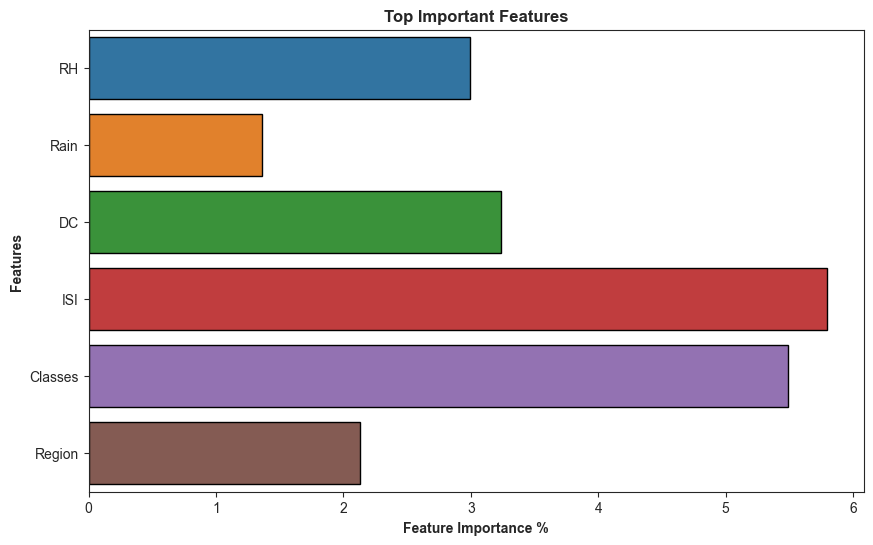

In [81]:
# feature importance
plt.figure(figsize=(10,6))
sns.set_style('ticks')
ax = sns.barplot(data=vif, x='vif', y='feature',ec = 'black')
ax.set_title('Top Important Features', weight='bold')
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

## Model Deployment

The accuracy of Linear Regression and Ridge Regression stands out with an impressive R-Squared value of approximately 98.059%. The Decision Tree model also performs well, achieving an accuracy of around 97.26%, indicating a high rate of correct predictions. Consequently, after careful evaluation, the Ridge Regression Model is selected as final choice.

In [82]:
import pickle
pickle.dump(ridge_reg,open("final_model.pkl",'wb'))

Files uploaded in github: https://github.com/floramaevillarin/Neural-Networks-and-Deep-Learning